In [2]:
#23/5/24 For extracting latent space from a autoencoder model
#Outputs the model and a text file

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/Targetdata/DrugTargets.csv')
autoencoder = keras.models.load_model('/Users/james/Documents/Honours/Python/Target_Selection/Drug_Targets/autoencode/bing.keras')

from sklearn.model_selection import train_test_split

trainset, testset = train_test_split(targetdata, test_size=0.2, random_state=82)
#Converts Toxicity Values to a list
ytrain = trainset['Toxicity_Values']
ytest = testset['Toxicity_Values']
ynet = targetdata['Toxicity_Values']
#Converts encoded drug target values to an array
xtrain = trainset.iloc[:, 2:].values
xtest = testset.iloc[:, 2:].values
xnet = targetdata.iloc[:, 2:].values

In [10]:
#Function to calculate net accuracy in relation to threshold
import math

def acccalc(predictions, threshold, xtest):
    correctcount = 0
    fpcount = 0
    tpcount = 0
    tncount = 0
    fncount = 0
    testpos = 0
    testneg = 0

    iterations = 0
    for samples in predictions:
        loops = 0
        for value in predictions[iterations]:
            testscore = xtest[iterations][loops]
            #testscore = xtrain[iterations][loops]
            if value > threshold:
                if testscore != 0:
                    testpos = testpos + 1
                    correctcount = correctcount + 1
                    tpcount = tpcount + 1
                else:
                    fpcount = fpcount + 1
                    testneg = testneg + 1
            else:
                if testscore != 0:
                    testpos = testpos + 1
                    fncount = fncount + 1
                else:
                    testneg = testneg + 1
                    correctcount = correctcount + 1
                    tncount = tncount + 1

            loops = loops + 1
        
    #netacc = correctcount / (fpcount + fncount + tpcount + tncount)
    #netfn = fncount / (fncount + tncount)
    #nettn = tncount / (fncount + tncount)
    #netacc = correctcount / (fpcount + fncount + tpcount + tncount)
    posacc = tpcount / testpos
    #negacc = tncount / testneg
    #netfp = fpcount / (fpcount + tpcount)
    #nettp = tpcount / (tpcount + fpcount)
    #f1 = (2 * tpcount) / ((2 * tpcount) + fpcount + fncount)
    
    tp = tpcount
    fp = fpcount
    tn = tncount
    fn = fncount
    
    temp = math.sqrt((fp + tn) * (tp + fp) * (tp + fn) * (tn + fn))
    if temp == 0:
        return(0)
    mcc = ((tp * tn) - (fp * fn)) / temp
    
#    temp = (( ( (tp + fp) * (fp + tn) ) + ( (tp + fn) * (fn + tn) ) ))
#    if temp == 0:
#        return(0)
#    kapp =  ( 2 * ((tp * tn) - (fn * fp)) ) / temp

    return(mcc)

colcount = len(xtest[0])
#ae_out = autoencoder.predict([ xtest.reshape(-1, colcount, 1) ])
#predictions = ae_out.reshape(2649,colcount)

toxtest = []
for items in ytest:
    toxtest.append(items)


optimal paramers at y= 0.7623872291645094 x= 0.36


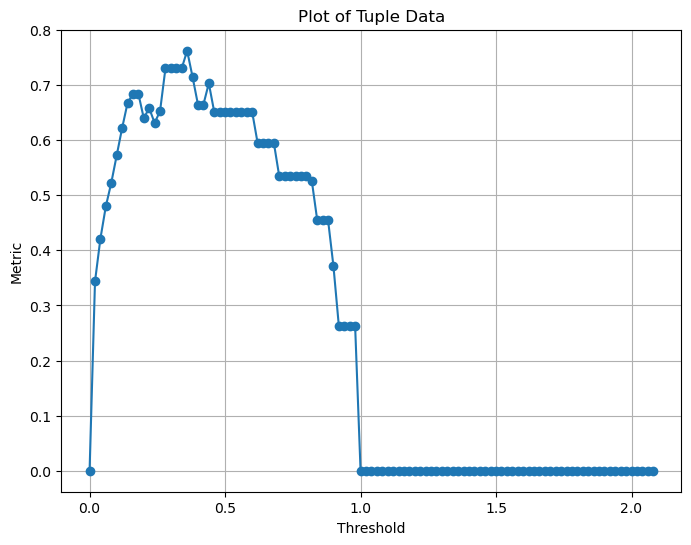

In [11]:
#Metric curve creation
acclist = []
thresholdlist = []
for threshold in np.arange(0, 2.1, 0.02):
    acclist.append(acccalc(predictions, threshold, xtest))
    thresholdlist.append(threshold)

import matplotlib.pyplot as plt
y_values = acclist
x_values = thresholdlist

max_y = max(y_values)
max_x = x_values[y_values.index(max_y)]

print('optimal paramers at y=', max_y, 'x=', max_x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-')

# Add titles and labels
plt.title('Plot of Tuple Data')
plt.ylabel('Metric')
plt.xlabel('Threshold')

# Display the plot
plt.grid(True)
plt.show()

In [3]:
toxtest = []
for items in ytest:
    toxtest.append(items)

#colcount = len(xtest[0])
colcount = len(xtrain[0])
#ae_out = autoencoder.predict([ xtrain.reshape(-1, colcount, 1) ])
ae_out = autoencoder.predict([ xtest.reshape(-1, colcount, 1) ])
outsize = len(ae_out)
predictions = ae_out.reshape(outsize,colcount)

83/83 [==============================] - 0s 397us/step


2024-05-30 09:53:52.924114: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [5]:
#Generic Metric testing for a given threshold
import math
correctcount = 0
fpcount = 0
tpcount = 0
tncount = 0
fncount = 0
testpos = 0
testneg = 0

iterations = 0
for samples in predictions:
    loops = 0
    for value in predictions[iterations]:
        testscore = xtest[iterations][loops]
        #testscore = xtrain[iterations][loops]
        if value > 0.36:
            if testscore != 0:
                testpos = testpos + 1
                correctcount = correctcount + 1
                tpcount = tpcount + 1
            else:
                fpcount = fpcount + 1
                testneg = testneg + 1
        else:
            if testscore != 0:
                testpos = testpos + 1
                fncount = fncount + 1
            else:
                testneg = testneg + 1
                correctcount = correctcount + 1
                tncount = tncount + 1
                
        loops = loops + 1



print('positives in data', testpos)
print('negatives in data', testneg, '\n')

print('fn count =', fncount)
print('tn count =', tncount)

print('tp count =', tpcount)
print('fp count =', fpcount, '\n')

netfn = fncount / (fncount + tncount)
nettn = tncount / (fncount + tncount)
netacc = correctcount / (fpcount + fncount + tpcount + tncount)
posacc = tpcount / testpos
negacc = tncount / testneg
netfp = fpcount / (fpcount + tpcount)
nettp = tpcount / (tpcount + fpcount)

print('net accuracy =', netacc)
print('positive accuracy =', posacc)
print('negative accuracy =', negacc, '\n')

fpr = fpcount / (fpcount + tncount)
tpr = tpcount / (tpcount + fncount)

print('fpr =', fpr)
print('tpr =', tpr, '\n')

f1 = (2 * tpcount) / ((2 * tpcount) + fpcount + fncount)
print('f1 score =',f1)

tp = tpcount
fp = fpcount
tn = tncount
fn = fncount

mcc = ((tp * tn) - (fp * fn)) / math.sqrt((fp + tn) * (tp + fp) * (tp + fn) * (tn + fn))

print('mcc =',mcc)

temp = (( ( (tp + fp) * (fp + tn) ) + ( (tp + fn) * (fn + tn) ) ))
kapp =  ( 2 * ((tp * tn) - (fn * fp)) ) / temp

print('cohen Kappa =',kapp)


positives in data 37086
negatives in data 847680 

fn count = 10596
tn count = 842382
tp count = 26490
fp count = 5298 

net accuracy = 0.9820359281437125
positive accuracy = 0.7142857142857143
negative accuracy = 0.99375 

fpr = 0.00625
tpr = 0.7142857142857143 

f1 score = 0.7692307692307693
mcc = 0.7623872291645094
cohen Kappa = 0.7599425011978918


In [6]:
#Notabely 0.5 was used as the cutoff point for determining if a cell is 0 or 1
#As the metrics are very good, we will extract the latent space for prediction 
features = autoencoder.layers[6].output
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 334, 1)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 334)               0         
                                                                 
 dense_18 (Dense)            (None, 160)               53600     
                                                                 
 dense_19 (Dense)            (None, 81)                13041     
                                                                 
 dense_20 (Dense)            (None, 42)                3444      
                                                                 
 dense_21 (Dense)            (None, 12)                516       
                                                                 
 dense_22 (Dense)            (None, 12)                

In [8]:
#Extracts data from latent space
from keras import backend as K
latent_space = K.function([autoencoder.layers[0].input], features)
output = latent_space([xnet])
latent = pd.DataFrame(output)

toxvals= []
for values in ynet:
    toxvals.append(values)
    
temp = pd.DataFrame(toxvals, columns=['Toxicity_Value'])

latentframe = pd.concat([temp, latent], axis=1)
latentframe.to_csv('/Users/james/Documents/Honours/Python/Target_Selection/Drug_Targets/autoencode/dtargetautoencdata.csv', index=False)

In [ ]:
targetdata

In [ ]:
#testing use of a softmax layer to predict toxicity in the test set

softmax_layer = keras.layers.Dense(2, activation="softmax")
input = latent.values
result = softmax_layer(input)

In [ ]:
res = result.numpy()
res

In [ ]:
len(res)

In [ ]:
loops = 0
corr = 0
neg = 0
for items in res:
    temp = items[0] - items[1]
    if temp > 0:
        bing = 1
    else:
        bing = 0
    if bing == ynet[loops]:
        corr = corr + 1 
    else:
        neg = neg + 1
    loops = loops + 1
print(corr / (corr + neg))

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

testout = latent_space([xnet])
latentest = pd.DataFrame(testout)

svc = SVC().fit(xnet, ynet)
print('svc raw =',svc.score(xnet, ynet))
knn = KNeighborsClassifier().fit(xnet, ynet)
print('knn raw =',knn.score(xnet, ynet))

svc = SVC().fit(latentest, ynet)
print('svc autoenc =',svc.score(latentest, ynet))
knn = KNeighborsClassifier().fit(latentest.values, ynet)
print('knn autoenc =',knn.score(latentest.values, ynet))

#It seems that the latent space data actually performed worse than the raw dataset
#Although it was using default hyperparameters so potentially it may perform better when optimised

svc raw = 0.6496526729084868
knn raw = 0.7016762307459982
svc autoenc = 0.5945333736031411
knn autoenc = 0.6953337360314105


In [13]:
count = 0
for items in ynet:
    if items == 0:
        count = count + 1
print(count / len(ynet))

0.5945333736031411


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

testout = latent_space([xtrain])
latentest = pd.DataFrame(testout)

svc = SVC().fit(xtrain, ytrain)
print('svc raw =',svc.score(xtrain, ytrain))
knn = KNeighborsClassifier().fit(xtrain, ytrain)
print('knn raw =',knn.score(xtrain, ytrain))

svc = SVC().fit(latent, ytrain)
print('svc autoenc =',svc.score(latent, ytrain))
knn = KNeighborsClassifier().fit(latent.values, ytrain)
print('knn autoenc =',knn.score(latent.values, ytrain))

#It seems that the latent space data actually performed worse than the raw dataset
#Although it was using default hyperparameters so potentially it may perform better when optimised

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

testout = latent_space([xtest])
latentest = pd.DataFrame(testout)

svc = SVC().fit(xtest, ytest)
print('svc raw =',svc.score(xtest, ytest))
knn = KNeighborsClassifier().fit(xtest, ytest)
print('knn raw =',knn.score(xtest, ytest))

svc = SVC().fit(latentest, ytest)
print('svc autoenc =',svc.score(latentest, ytest))
knn = KNeighborsClassifier().fit(latentest.values, ytest)
print('knn autoenc =',knn.score(latentest.values, ytest))

#It seems that the latent space data actually performed worse than the raw dataset
#Although it was using default hyperparameters so potentially it may perform better when optimised

In [ ]:
#While the model seemed well made previously, with the additional of extra metrics the following occurs
model = 8.model
positives in data 13245
negatives in data 871521
fn count = 2649
tn count = 847680
tp count = 10596
fp count = 23841
net accuracy = 0.9700598802395209
positive accuracy = 0.8
negative accuracy = 0.9726443768996961
fpr = 0.02735562310030395
tpr = 0.8
f1 score = 0.4444444444444444
mcc = 0.4851079668748027
